<a href="https://colab.research.google.com/github/anj7726/atltas23/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
msft=yf.Ticker("MSFT")
msft_data=msft.history(period="max")
msft_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054188,0.062156,0.054188,0.059500,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.059500,0.062688,0.059500,0.061625,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.061625,0.063219,0.061625,0.062688,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.062688,0.063219,0.060562,0.061093,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061093,0.061625,0.059500,0.060031,47894400,0.0,0.0


In [5]:
tesla=yf.Ticker("TSLA")
tesla_data=tesla.history(period="max")

In [7]:
tesla_data.reset_index(drop=True,inplace=True)
tesla_data.to_csv('tesla_data.csv',index=False)
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [15]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data=requests.get(url).text
soup=BeautifulSoup(html_data,"html5lib")
data1=[]
for table in soup.find_all('table'):
    if('Tesla Quarterly Revenue' in table.find('th').text): # Corrected 'tesla' to 'Tesla'
        rows=table.find_all('tr')
        for row in rows:
            col=row.find_all('td')
            if col!=[]:
                date=col[0].text
                revenue=col[1].text.replace(',','').replace('$','')
                data1.append({"Date":date,"Revenue":revenue})
tesla_revenue=pd.DataFrame(data1)

In [17]:
tesla_revenue["Revenue"]=tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2991493788.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"]=tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)


In [18]:
tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,
52,2009-09-30,46
53,2009-06-30,27


In [19]:
GameStop=yf.Ticker("GME")
gme_data=GameStop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.to_csv('gme_data.csv',index=False)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [20]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data=requests.get(url).text
soup=BeautifulSoup(html_data,"html.parser")
data=[]
for table in soup.find_all('table'):
    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows= table.find_all('tr')
        for row in rows:
            col= row.find_all('td')
            if col != []:
                date=col[0].text
                revenue=col[1].text.replace(',','').replace('$','')
                data.append({"Date":date,"Revenue":revenue})
gme_revenue=pd.DataFrame(data)

In [21]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


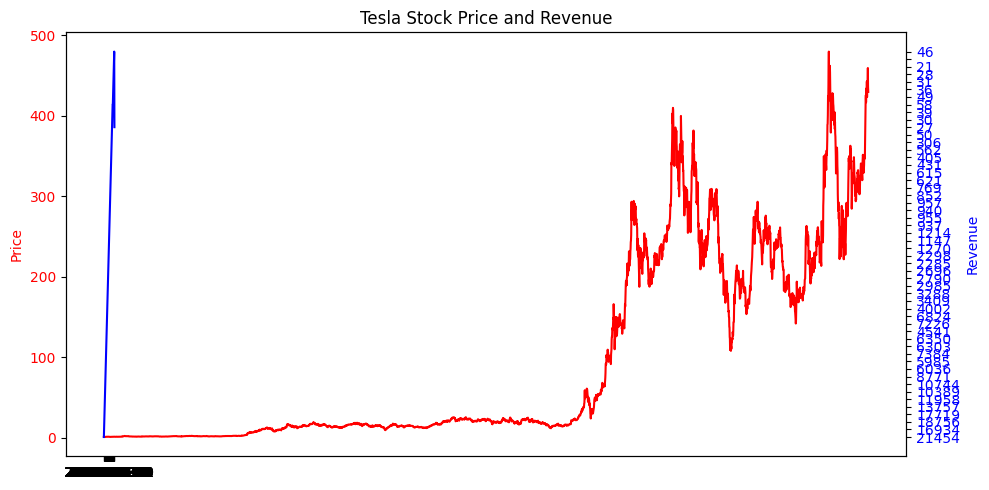

In [28]:
make_graph(tesla_data,tesla_revenue,"Tesla")

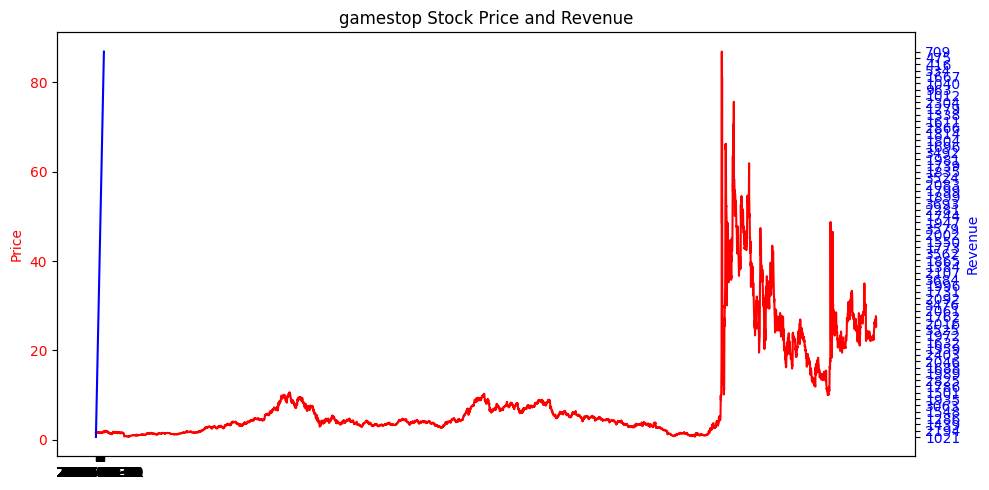

In [30]:
make_graph(gme_data,gme_revenue,'gamestop')